# CAPSTONE: Chicago Crime Stats Modeling Preparation

**Author: Darius Smith**

**BrainStation | Data Science | April 11, 2023**

## Table of Contents

[Data Information](#Dataset-Information)

[Data Dictionary](#Data-Dictionary)

[Objectives](#Objectives)

[Non-Numeric and Numeric Columns](#Non-Numeric-and-Numeric-Columns)

[Modeling](#Modeling)

[Backward Selection](#Backward-Selection)

[Conclusion](#Conclusion)

This notebook a continuation of the Chicago Crime Stats CAPSTONE project. In Chicago Crime Stats Data Wrangling/Cleaning and Basic EDA, there was an introduction to the crime data. The first step that was taken was to clean the data, and then conducting some basic EDA. There was specifically an analysis of what the data contained in each column, what insights were noticed, and then creating visuals for a few numerical and categorical columns to get a representation of what what being viewed. In this notebook there will be a look at converting non-numerical columns to numerical for modeling. 

This will be done using visuals, but also using some statistical modeling techniques. From there, the intial exploration will be extended to the problem statement to be more predictive in nature: 

>**“Using machine learning, how may we predict how 'Arrests' change with respect to Ward, Community Area, and other associated features so that we can make communities in Chicago safer for everyone?”**

## Dataset Information

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

The dataset used in this notebook has been narrowed to look at crimes from 2016-2019.

## Data Dictionary  

As a refresher, the data dictionary is again listed below. This will be a useful reference if we are ever confused about what a particular column of data means.

Data about *WHERE* incidents occured: 

- **Block** - The partially redacted address where the incident occured, placing it on the same black as the actual address. (categorical) 

- **Location Description** - Description of the location where the incident occured. (categorical)

- **Beat** - Indicates the beat where the incident occured. A beat is the smallest geographic area - each beat has a dedicated police beat car. Three (3) to five (5) beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has (22) beats. (categorical) 

- **District** - Indicates the police district where the incident occured. (categorical) 

- **Ward** - The ward (City Council district) where the incident occured. (numerical) 

- **Community Area** - Indicates the community area where the incident occured. Chicago has (77) community areas. (categorical) 

- **X Coordinate** - The x coordinate of the location where the incident occured in the State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Y Coordinate** - The y coordinate of the location where the incident occured in the State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Latitude** - The latitude of the location where the incident occured. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Longitude** - The longitude of the location where the incident occured. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)

- **Location** - The location where the incident occured in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block. (numerical)



Data about *WHEN* incidents occured:


- **Date** - Date when the incident occured. (numerical)

- **Year** - Year the incident occured. (numerical)

- **ID** - Unique identifier for the record. (numerical) 

- **Case Number** - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident. (categorical) 


Data about *WHAT* was the incident

- **IUCR** - The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. (categorical)

- **Primary Type** - The primary description of the IUCR code.(categorical) 

- **Description** - The secondary description of the IUCR code, a subcategory of the primary description. (categorical)

- **Domestic** - Indicates whether the incident was domestic related as defined by the Illinois Domestic Violence Act. (categorical) 

- **FBI Code** - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). (categorical) 


Data about *CONSEQUENCES* of the incident
 
- **Arrest** - Indicates whether an arrest was made. (categorical) 


*WHEN* data was updated by the city of Chicago
 
- **Updated On** - Date and time the record was last updated. (numerical)

**NOTE**: The target variable for modeling will be the `Arrest` column.

Question of Interest: Will there be an `Arrest`?

## Objectives

- Import necessary libraries 
    - Acquire the data
    - Inspect the Data


- Checking if categorical columns can be changed to numerical columns. 

- EDA - Exploratory Data Analysis
    - With each other (checking collinearity)
    - With dependent variable (good variable for modeling)
    
- Modeling the Data
    - Choose the type of model
    - Testing the accuracy (Logistic Regression) 

In [1]:
#Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#Viewing the clean dataframe. 
crime_df_decreased = pd.read_csv('Chicago_crime_clean_data.csv')
crime_df_decreased.head(5) 

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11864018,JC476123,2019-09-24 08:00:00,022XX S MICHIGAN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,...,3.0,33.0,11,1177560.0,1889548.0,2019,10/20/2019 03:56:02 PM,41.852248,-87.623786,"(41.852248185, -87.623786256)"
1,11859805,JC471592,2019-10-13 20:30:00,024XX W CHICAGO AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,...,26.0,24.0,06,1160005.0,1905256.0,2019,10/20/2019 04:03:03 PM,41.895732,-87.687784,"(41.895732399, -87.687784384)"
2,11863808,JC476236,2019-10-05 18:30:00,0000X N LOOMIS ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,27.0,28.0,06,1166986.0,1900306.0,2019,10/20/2019 03:56:02 PM,41.882002,-87.662287,"(41.88200224, -87.662286977)"
3,11859727,JC471542,2019-10-13 19:00:00,016XX W ADDISON ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,47.0,6.0,14,1164930.0,1923972.0,2019,10/20/2019 04:03:03 PM,41.946987,-87.669164,"(41.946987144, -87.669163602)"
4,11859656,JC471240,2019-10-13 14:10:00,051XX N BROADWAY,0560,ASSAULT,SIMPLE,GAS STATION,False,False,...,47.0,3.0,08A,1167380.0,1934505.0,2019,10/20/2019 04:03:03 PM,41.975838,-87.659854,"(41.975837637, -87.659853835)"


In [3]:
crime_df_decreased.tail(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1054828,12600864,JF122900,2017-10-21 11:39:00,022XX N AVERS AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,True,True,...,35.0,22.0,02,1149786.0,1909259.0,2017,12/06/2022 03:45:23 PM,41.906922,-87.725212,"(41.906921892, -87.725212497)"
1054829,12737370,JF288776,2019-06-02 09:14:00,021XX N LATROBE AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,...,36.0,19.0,17,1141037.0,1913776.0,2019,10/02/2022 04:45:26 PM,41.919483,-87.757240,"(41.919482747, -87.75724017)"
1054830,12739465,JF291205,2017-09-05 09:00:00,044XX S FAIRFIELD AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC GROUNDS,False,False,...,15.0,58.0,17,1158774.0,1875140.0,2017,12/06/2022 03:45:23 PM,41.813116,-87.693130,"(41.813116223, -87.693130264)"
1054831,12711358,JF257015,2017-01-01 00:00:00,059XX N RAVENSWOOD AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,40.0,77.0,02,1164423.0,1943606.0,2017,11/07/2022 03:50:09 PM,42.000874,-87.670469,"(42.000874331, -87.670468763)"
1054832,12728489,JF277971,2019-05-12 14:44:00,054XX S SEELEY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,16.0,61.0,17,1163615.0,1868644.0,2019,10/19/2022 04:49:39 PM,41.795190,-87.675556,"(41.795190075, -87.675555583)"


**The dataset is 'clean', however, it is always good practice to be sure. Checking for duplicated rows, and null values by getting an EDA summary.** 

In [4]:
#EDA summary
print(f"Rows: {crime_df_decreased.shape[0]}")
print(f"Columns: {crime_df_decreased.shape[1]}")
print(f"Missing values: {crime_df_decreased.isna().sum().sum()}")
print(f"Duplicated rows: {crime_df_decreased.duplicated().sum()}")

Rows: 1054833
Columns: 22
Missing values: 0
Duplicated rows: 0


**There are 1,054,833 incidents with 22 columns. There are 0 missing values, and 0 duplicates. Now, moving forward with checking the datatypes.** 

In [5]:
#Checking the datatypes. 
crime_df_decreased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054833 entries, 0 to 1054832
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1054833 non-null  int64  
 1   Case Number           1054833 non-null  object 
 2   Date                  1054833 non-null  object 
 3   Block                 1054833 non-null  object 
 4   IUCR                  1054833 non-null  object 
 5   Primary Type          1054833 non-null  object 
 6   Description           1054833 non-null  object 
 7   Location Description  1054833 non-null  object 
 8   Arrest                1054833 non-null  bool   
 9   Domestic              1054833 non-null  bool   
 10  Beat                  1054833 non-null  int64  
 11  District              1054833 non-null  float64
 12  Ward                  1054833 non-null  float64
 13  Community Area        1054833 non-null  float64
 14  FBI Code              1054833 non-

**We have different datatypes contained in the dataset. There are (2) booleans, (7) float64, (3) int, and (10) object datatypes.** 

## Non-Numeric and Numeric Columns

There is a good mix of non-numeric and numeric columns. In the beginning of the notebook, numeric, and non-numeric were listed out. Now, after looking a little more extensively at the data, there will be an attempt to convert some of the non-numeric columns to numeric, and to also convert `float64` into `int64`. This will be helpful with modeling down the road. 

The following columns will be attempted:

1. `Date` - converting to datetime and then extracting month, day, week, and day of week from it.
2. `IUCR` - converting to int.
3. `Arrest` - converting to int.
4. `Domestic` - converting to int.
5. `Ward`- converting to int.
6. `Community Area` - converting to int.
7. `District` - converting to int.


In [6]:
#Converting 'Date' to datetime format
print(pd.DatetimeIndex(crime_df_decreased['Date']))

DatetimeIndex(['2019-09-24 08:00:00', '2019-10-13 20:30:00',
               '2019-10-05 18:30:00', '2019-10-13 19:00:00',
               '2019-10-13 14:10:00', '2019-10-13 19:50:00',
               '2019-10-13 00:05:00', '2019-10-13 03:03:00',
               '2019-10-13 08:00:00', '2019-08-01 06:00:00',
               ...
               '2019-03-28 00:00:00', '2019-06-22 19:32:00',
               '2017-03-07 00:00:00', '2018-08-12 14:43:00',
               '2018-12-12 17:00:00', '2017-10-21 11:39:00',
               '2019-06-02 09:14:00', '2017-09-05 09:00:00',
               '2017-01-01 00:00:00', '2019-05-12 14:44:00'],
              dtype='datetime64[ns]', name='Date', length=1054833, freq=None)


In [7]:
date_col = pd.DatetimeIndex(crime_df_decreased['Date'])

In [8]:
#Adding Month as a column to dataframe
crime_df_decreased['Month'] = date_col.month

In [9]:
#Adding Day as a column to dateframe
crime_df_decreased['Day'] = date_col.day

In [10]:
#Adding Week as a column to dateframe
crime_df_decreased['Week'] = date_col.week

/var/folders/26/3jnnrvjs3534y_dh9pff888c0000gn/T/ipykernel_66503/1570646082.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  crime_df_decreased['Week'] = date_col.week


In [11]:
#Adding Day of Week as a column to dateframe
crime_df_decreased['Day of Week'] = date_col.dayofweek

In [12]:
#Adding Hour as a column to dataframe
crime_df_decreased['Hour'] = date_col.hour

In [13]:
#Sanity Check
crime_df_decreased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054833 entries, 0 to 1054832
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1054833 non-null  int64  
 1   Case Number           1054833 non-null  object 
 2   Date                  1054833 non-null  object 
 3   Block                 1054833 non-null  object 
 4   IUCR                  1054833 non-null  object 
 5   Primary Type          1054833 non-null  object 
 6   Description           1054833 non-null  object 
 7   Location Description  1054833 non-null  object 
 8   Arrest                1054833 non-null  bool   
 9   Domestic              1054833 non-null  bool   
 10  Beat                  1054833 non-null  int64  
 11  District              1054833 non-null  float64
 12  Ward                  1054833 non-null  float64
 13  Community Area        1054833 non-null  float64
 14  FBI Code              1054833 non-

**'Date' has been converted to 'datetime' datatype, and we also have our month and day columns. I will check the columns to see value counts and what data visually looks like for both `Month`,`Day`, `Week`, `Day of Week`, and `Hour`. After this, I will move forward with converting the rest of the non-numerical columns.** 

In [14]:
crime_df_decreased['Month'].value_counts().sort_index()

1     82005
2     73193
3     83642
4     84313
5     94538
6     94819
7     98800
8     98288
9     90868
10    89890
11    82363
12    82114
Name: Month, dtype: int64

In [15]:
crime_df_decreased['Day'].value_counts().sort_index()

1     40130
2     34600
3     34863
4     34633
5     34807
6     34558
7     34077
8     34183
9     34004
10    33758
11    33508
12    33841
13    33993
14    34061
15    35259
16    35174
17    35010
18    34458
19    34474
20    35355
21    34644
22    34805
23    35020
24    34434
25    34074
26    34128
27    34377
28    34176
29    32306
30    31975
31    20148
Name: Day, dtype: int64

In [16]:
crime_df_decreased['Week'].value_counts().sort_index()

1     19593
2     18405
3     18391
4     18907
5     18027
6     17362
7     18717
8     18078
9     18402
10    18434
11    18820
12    19111
13    19435
14    19028
15    19831
16    19791
17    19950
18    20979
19    20525
20    21440
21    21926
22    22680
23    21780
24    21930
25    22043
26    22510
27    22637
28    21979
29    22019
30    22472
31    23343
32    22004
33    22387
34    21494
35    22020
36    20434
37    21389
38    21740
39    20540
40    20501
41    19980
42    20501
43    20327
44    20748
45    19116
46    18745
47    18692
48    19390
49    19045
50    18747
51    18943
52    17358
53     2187
Name: Week, dtype: int64

In [17]:
crime_df_decreased['Day of Week'].value_counts().sort_index()

0    150485
1    148596
2    147806
3    148646
4    158466
5    153670
6    147164
Name: Day of Week, dtype: int64

In [18]:
crime_df_decreased['Hour'].value_counts().sort_index()

0     49581
1     31742
2     27298
3     22448
4     17941
5     15783
6     18641
7     25970
8     37052
9     47992
10    47261
11    48786
12    63231
13    51301
14    53965
15    57950
16    56881
17    58035
18    60912
19    60113
20    56221
21    51842
22    51005
23    42882
Name: Hour, dtype: int64

### Observations of New Columns

- For the `Month` column, it is observed that May - August has the highest number of incidents. This could be due to warmer weather and more folks being outside. 
- For the `Day` column, there does not seem to be any particular trend. The 1st day of a month has the highest amount of incidents. Could this be due to rent being due or some other factor?
- For `Week` column there does not seem to be any particular trend. 
- For `Day of Week` column Friday and Saturday are when most incidents occur. 
- For `Hour` column, more incidents take place in the afternoon and evening.

Now moving on to convert the other non-numerical data. 

In [19]:
crime_df_decreased['IUCR'].unique()

array(['1154', '0860', '0810', '1320', '0560', '0486', '1310', '2826',
       '2027', '2825', '1812', '0890', '0460', '0820', '1477', '0910',
       '2820', '1365', '1150', '0497', '0870', '2014', '0498', '4387',
       '1305', '141C', '1345', '051A', '1153', '0610', '3710', '0620',
       '0850', '1152', '1822', '0530', '1020', '1130', '041A', '031A',
       '0281', '0265', '0454', '1506', '143A', '2024', '1330', '033A',
       '0520', '2092', '0430', '1120', '5111', '1122', '0266', '0545',
       '1753', '4650', '0550', '0496', '0291', '2890', '0470', '1750',
       '0484', '1206', '1210', '2850', '5002', '502P', '0630', '1850',
       '0495', '4651', '2250', '1151', '0325', '1582', '2026', '3731',
       '1360', '5000', '041B', '5112', '0261', '1752', '3800', '0488',
       '1261', '0334', '0650', '1195', '0320', '1754', '0420', '1562',
       '0263', '0313', '2021', '141A', '1480', '0930', '2230', '1110',
       '1563', '0326', '0312', '3730', '0554', '0557', '0584', '1811',
      

After taking a look at the unique array `IUCR` it is clear that we cannot change this to a numerical datatype. After doing some research, these codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports. In this case, converting `IUCR` to a different datatype would misclassify the data we have. I will now move forward with observing the `Arrest` column. 

In [20]:
#Observing the array for Arrest. It is True or False. 
crime_df_decreased['Arrest'].unique()

array([False,  True])

In [21]:
crime_df_decreased['Arrest'].value_counts()

False    840730
True     214103
Name: Arrest, dtype: int64

The `Arrest` column is a boolean datatype meaning it is 'True' or 'False', '1' or '0'. I will convert this column into a binary column. 

In [22]:
#Converting Arrest into a binary column. 
crime_df_decreased['Arrest'] = np.where(crime_df_decreased['Arrest'] == True,1,0)

In [23]:
#Sanity check
crime_df_decreased['Arrest'].value_counts()

0    840730
1    214103
Name: Arrest, dtype: int64

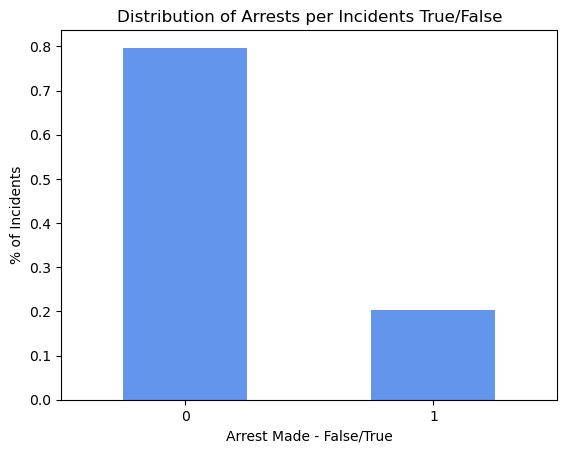

In [24]:
crime_df_decreased['Arrest'].value_counts(normalize=True).plot(kind = 'bar',color = 'cornflowerblue')
plt.title('Distribution of Arrests per Incidents True/False')
plt.xlabel('Arrest Made - False/True')
plt.ylabel('% of Incidents')
plt.xticks(rotation=0)
plt.show()

In [25]:
#Sanity check 2
crime_df_decreased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054833 entries, 0 to 1054832
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1054833 non-null  int64  
 1   Case Number           1054833 non-null  object 
 2   Date                  1054833 non-null  object 
 3   Block                 1054833 non-null  object 
 4   IUCR                  1054833 non-null  object 
 5   Primary Type          1054833 non-null  object 
 6   Description           1054833 non-null  object 
 7   Location Description  1054833 non-null  object 
 8   Arrest                1054833 non-null  int64  
 9   Domestic              1054833 non-null  bool   
 10  Beat                  1054833 non-null  int64  
 11  District              1054833 non-null  float64
 12  Ward                  1054833 non-null  float64
 13  Community Area        1054833 non-null  float64
 14  FBI Code              1054833 non-

The `Arrest` column has successfully been converted into a binary column. Proceeding to move foward with converting the next column `Domestic`.

In [26]:
#Observing the array for Domestic. It is True or False. 
crime_df_decreased['Domestic'].unique()

array([False,  True])

In [27]:
crime_df_decreased['Domestic'].value_counts()

False    882608
True     172225
Name: Domestic, dtype: int64

The `Domestic` column is a boolean datatype meaning it is 'True' or 'False', '1' or '0'. I will convert this column into a binary column. 

In [28]:
#Converting Domestic into a binary column. 
crime_df_decreased['Domestic'] = np.where(crime_df_decreased['Domestic'] == True,1,0)

In [29]:
#Sanity check
crime_df_decreased['Domestic'].value_counts()

0    882608
1    172225
Name: Domestic, dtype: int64

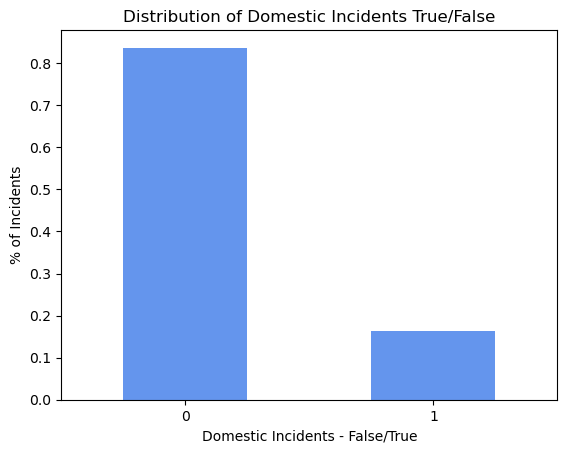

In [30]:
crime_df_decreased['Domestic'].value_counts(normalize=True).plot(kind = 'bar',color = 'cornflowerblue')
plt.title('Distribution of Domestic Incidents True/False')
plt.xlabel('Domestic Incidents - False/True')
plt.ylabel('% of Incidents')
plt.xticks(rotation=0)
plt.show()

We have now successfully converted the `Domestic` column. Now moving forward with the `Ward` column. 

In [31]:
#Observing the array for Ward.
crime_df_decreased['Ward'].unique()

array([ 3., 26., 27., 47., 25., 20.,  6., 28., 18., 43., 48., 42.,  9.,
       17., 10.,  4.,  8.,  1., 34., 21., 35., 23., 13.,  2., 45.,  7.,
        5., 24., 16., 19., 41., 33., 40., 30., 22., 36., 37., 50., 11.,
       32., 44., 31., 14., 29., 46., 12., 15., 49., 38., 39.])

The data in the `Ward` column is currently of datatype float64. In order to convert these values from float (decimal) to int (whole number), I will need to make sure to round the decimal values to the nearest integer before converting the data type to int. To do this, I will use the `round()` function. 

In [32]:
#Using the round function
crime_df_decreased['Ward'] = round(crime_df_decreased['Ward']).astype('int')

In [33]:
#Checking the datatype
print(crime_df_decreased['Ward'].dtype)

int64


In [34]:
#Sanity check by observing the array.
crime_df_decreased['Ward'].unique()

array([ 3, 26, 27, 47, 25, 20,  6, 28, 18, 43, 48, 42,  9, 17, 10,  4,  8,
        1, 34, 21, 35, 23, 13,  2, 45,  7,  5, 24, 16, 19, 41, 33, 40, 30,
       22, 36, 37, 50, 11, 32, 44, 31, 14, 29, 46, 12, 15, 49, 38, 39])

We have now successfully converted the `Ward` column. Now moving forward with the `Community Area` column. 

In [35]:
#Observing the array for Community Area.
crime_df_decreased['Community Area'].unique()

array([33., 24., 28.,  6.,  3., 42., 68., 69., 25., 70.,  7., 77., 23.,
        8., 49., 71., 52., 44., 53., 27., 21., 40., 56., 73., 65., 16.,
       22., 43., 26., 66., 20., 29.,  4., 47., 72., 46., 31., 10., 48.,
       32., 14., 75., 62., 67., 38.,  9., 30., 15.,  2., 61., 39., 76.,
       36., 51., 63., 19., 35., 17.,  5., 54., 34., 11., 58.,  1., 37.,
       64., 60., 12., 41., 13., 18., 57., 59., 45., 55., 74., 50.])

Since the data in the `Community Area` column is in of datatype float64, I will use the `round()` function which was used to convert the `Ward` column and then proceeding to convert to an `int` datatype. 

In [36]:
#Using the round function
crime_df_decreased['Community Area'] = round(crime_df_decreased['Community Area']).astype('int')

In [37]:
#Checking the datatype
print(crime_df_decreased['Community Area'].dtype)

int64


In [38]:
#Sanity check by observing the array.
crime_df_decreased['Community Area'].unique()

array([33, 24, 28,  6,  3, 42, 68, 69, 25, 70,  7, 77, 23,  8, 49, 71, 52,
       44, 53, 27, 21, 40, 56, 73, 65, 16, 22, 43, 26, 66, 20, 29,  4, 47,
       72, 46, 31, 10, 48, 32, 14, 75, 62, 67, 38,  9, 30, 15,  2, 61, 39,
       76, 36, 51, 63, 19, 35, 17,  5, 54, 34, 11, 58,  1, 37, 64, 60, 12,
       41, 13, 18, 57, 59, 45, 55, 74, 50])

We have now successfully converted the `Community Area` column. Now moving forward with the `District` column.

In [39]:
#Observing the array for District.
crime_df_decreased['District'].unique()

array([ 1., 12., 19., 20.,  3.,  7., 15.,  8., 18., 25.,  5.,  6.,  4.,
       11., 14.,  2., 22., 17., 10., 16., 24.,  9., 31.])

Since the data in the `District` column is in of datatype float64, I will use the `round()` function which was used to convert the `Ward`, and `Community Area` column and then proceed to convert to an `int` datatype. 

In [40]:
#Using the round function
crime_df_decreased['District'] = round(crime_df_decreased['District']).astype('int')

In [41]:
#Checking the datatype
print(crime_df_decreased['District'].dtype)

int64


In [42]:
#Sanity check by observing the array.
crime_df_decreased['District'].unique()

array([ 1, 12, 19, 20,  3,  7, 15,  8, 18, 25,  5,  6,  4, 11, 14,  2, 22,
       17, 10, 16, 24,  9, 31])

In [43]:
crime_df_decreased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054833 entries, 0 to 1054832
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1054833 non-null  int64  
 1   Case Number           1054833 non-null  object 
 2   Date                  1054833 non-null  object 
 3   Block                 1054833 non-null  object 
 4   IUCR                  1054833 non-null  object 
 5   Primary Type          1054833 non-null  object 
 6   Description           1054833 non-null  object 
 7   Location Description  1054833 non-null  object 
 8   Arrest                1054833 non-null  int64  
 9   Domestic              1054833 non-null  int64  
 10  Beat                  1054833 non-null  int64  
 11  District              1054833 non-null  int64  
 12  Ward                  1054833 non-null  int64  
 13  Community Area        1054833 non-null  int64  
 14  FBI Code              1054833 non-

It is observed that `Date` is still in object format. I will change this to datetime. 

In [44]:
crime_df_decreased['Date'] = pd.to_datetime(crime_df_decreased['Date'])

In [45]:
#Sanity Check 
crime_df_decreased['Date'].unique

<bound method Series.unique of 0         2019-09-24 08:00:00
1         2019-10-13 20:30:00
2         2019-10-05 18:30:00
3         2019-10-13 19:00:00
4         2019-10-13 14:10:00
                  ...        
1054828   2017-10-21 11:39:00
1054829   2019-06-02 09:14:00
1054830   2017-09-05 09:00:00
1054831   2017-01-01 00:00:00
1054832   2019-05-12 14:44:00
Name: Date, Length: 1054833, dtype: datetime64[ns]>

In [46]:
crime_df_decreased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054833 entries, 0 to 1054832
Data columns (total 27 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1054833 non-null  int64         
 1   Case Number           1054833 non-null  object        
 2   Date                  1054833 non-null  datetime64[ns]
 3   Block                 1054833 non-null  object        
 4   IUCR                  1054833 non-null  object        
 5   Primary Type          1054833 non-null  object        
 6   Description           1054833 non-null  object        
 7   Location Description  1054833 non-null  object        
 8   Arrest                1054833 non-null  int64         
 9   Domestic              1054833 non-null  int64         
 10  Beat                  1054833 non-null  int64         
 11  District              1054833 non-null  int64         
 12  Ward                  1054833 non-null  in

We have now successfully converted the majority of the columns that we wanted into numerical values. We have (**17**) numerical columns, however, we still have (**9**) columns that are object datatype. I will check the value counts of them before deciding what to do with them before modeling. In addition, I will conduct a 'grouby' to see the relation between our target variable (`Arrest`) and the columns. The `pd.get_dummies` method may need to be used given that there may be many additional colummn created. 

In [47]:
crime_df_decreased['Case Number'].value_counts()

HZ140230    6
JC470284    5
HZ403466    4
HZ554936    4
JA206252    4
           ..
JA266982    1
JA266921    1
JA266887    1
JA266975    1
JF277971    1
Name: Case Number, Length: 1054702, dtype: int64

**There are 1,054,702 different case numbers.**

In [48]:
crime_df_decreased['Block'].value_counts()

001XX N STATE ST        3808
008XX N MICHIGAN AVE    1939
0000X W TERMINAL ST     1738
0000X N STATE ST        1635
0000X S STATE ST        1466
                        ... 
0000X W G10 ST             1
037XX N AVERS AVE          1
057XX N CICERO AVE         1
022XX W 90TH ST            1
066XX N Harlem Ave         1
Name: Block, Length: 33394, dtype: int64

In [49]:
#Using grouby to understand relationship 
crime_df_decreased['Arrest'].groupby(crime_df_decreased['Block']).value_counts().head(10).sort_values()

Block             Arrest
0000X E 101ST ST  1          8
0000X E 101ST PL  1         14
0000X E 100TH ST  1         16
0000X E 100TH PL  1         24
0000X E 101ST ST  0         31
0000X E 102ND PL  1         44
                  0         56
0000X E 100TH PL  0         57
0000X E 101ST PL  0         64
0000X E 100TH ST  0         67
Name: Arrest, dtype: int64

**There 33,394 different blocks.**

In [50]:
crime_df_decreased['IUCR'].value_counts()

0486    96341
0820    95653
0460    64676
0810    59614
1310    53863
        ...  
0272        1
0830        1
3720        1
1230        1
5113        1
Name: IUCR, Length: 355, dtype: int64

In [51]:
crime_df_decreased['Arrest'].groupby(crime_df_decreased['IUCR']).value_counts().head(10).sort_values()

IUCR  Arrest
0141  0            1
      1            1
0262  0            2
0263  1           17
0261  1           25
0142  1           28
0263  0          102
0261  0          208
0110  1          901
      0         1644
Name: Arrest, dtype: int64

**There are 355 different IUCR codes.** When checking for the code online, I wasn't able to find what the specific `IURC` code meant, however, in Chicago, 0110 is the police code for first degree murder. Maybe the two are correlated. 

In [52]:
crime_df_decreased['Primary Type'].value_counts()

THEFT                                250325
BATTERY                              198570
CRIMINAL DAMAGE                      114196
ASSAULT                               78911
DECEPTIVE PRACTICE                    72010
OTHER OFFENSE                         67837
NARCOTICS                             52524
BURGLARY                              48551
MOTOR VEHICLE THEFT                   41506
ROBBERY                               41491
CRIMINAL TRESPASS                     26779
WEAPONS VIOLATION                     19912
OFFENSE INVOLVING CHILDREN             8985
PUBLIC PEACE VIOLATION                 5978
CRIM SEXUAL ASSAULT                    5093
INTERFERENCE WITH PUBLIC OFFICER       4867
SEX OFFENSE                            4250
PROSTITUTION                           2931
HOMICIDE                               2575
ARSON                                  1707
CRIMINAL SEXUAL ASSAULT                1081
LIQUOR LAW VIOLATION                    915
STALKING                        

In [53]:
crime_df_decreased['Arrest'].groupby(crime_df_decreased['Primary Type']).value_counts().head(10).sort_values()

Primary Type                       Arrest
CONCEALED CARRY LICENSE VIOLATION  0             14
ARSON                              1            177
CONCEALED CARRY LICENSE VIOLATION  1            455
ARSON                              0           1530
BURGLARY                           1           2484
ASSAULT                            1          14052
BATTERY                            1          41090
BURGLARY                           0          46067
ASSAULT                            0          64859
BATTERY                            0         157480
Name: Arrest, dtype: int64

**There are 34 different primary type codes. It is clear that Battery, Burgulary, Assault, Arson, and Concealed Carry License Violation are the most common primary type codes.** 

In [54]:
crime_df_decreased['Description'].value_counts()

SIMPLE                                         117410
DOMESTIC BATTERY SIMPLE                         96341
$500 AND UNDER                                  95653
OVER $500                                       59614
TO VEHICLE                                      57406
                                                ...  
BIGAMY                                              1
ATTEMPT AGGRAVATED - OTHER DANGEROUS WEAPON         1
AGGRAVATED PROTECTED EMPLOYEE - HANDGUN             1
ABUSE / NEGLECT - CARE FACILITY                     1
VIOLENT OFFENDER - ANNUAL REGISTRATION              1
Name: Description, Length: 428, dtype: int64

In [55]:
crime_df_decreased['Arrest'].groupby(crime_df_decreased['Description']).value_counts().head(10).sort_values()

Description                      Arrest
ABUSE / NEGLECT - CARE FACILITY  0             1
ABUSE/NEGLECT: CARE FACILITY     1             2
                                 0            35
AGG CRIM SEX ABUSE FAM MEMBER    1            58
AGG PO HANDS ETC SERIOUS INJ     1            81
AGG CRIMINAL SEXUAL ABUSE        1           121
                                 0           509
AGG CRIM SEX ABUSE FAM MEMBER    0           652
$500 AND UNDER                   1          3757
                                 0         91896
Name: Arrest, dtype: int64

**There are 428 different description types. One observation made is that there are more non-arrests made then made** 

In [56]:
crime_df_decreased['Location Description'].value_counts()

STREET                                235727
RESIDENCE                             177135
APARTMENT                             135836
SIDEWALK                               85689
OTHER                                  43116
                                       ...  
GOVERNMENT BUILDING                        1
CHA HALLWAY / STAIRWELL / ELEVATOR         1
MOVIE HOUSE / THEATER                      1
BOAT / WATERCRAFT                          1
CTA "L" TRAIN                              1
Name: Location Description, Length: 187, dtype: int64

In [57]:
crime_df_decreased['Arrest'].groupby(crime_df_decreased['Location Description']).value_counts().head(10).sort_values()

Location Description                             Arrest
AIRCRAFT                                         1          29
AIRPORT BUILDING NON-TERMINAL - SECURE AREA      1          41
AIRPORT EXTERIOR - NON-SECURE AREA               1          72
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA  1          75
AIRPORT BUILDING NON-TERMINAL - SECURE AREA      0         261
AIRCRAFT                                         0         267
AIRPORT EXTERIOR - NON-SECURE AREA               0         299
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA  0         394
ABANDONED BUILDING                               1         656
                                                 0         721
Name: Arrest, dtype: int64

**There are 187 location descriptions.**

In [58]:
crime_df_decreased['FBI Code'].value_counts()

06     250325
08B    167879
14     114196
26      93816
11      64902
08A     59732
18      52534
05      48551
07      41506
03      41491
04B     31489
04A     23318
15      20386
24       9723
02       6892
10       6717
20       6358
17       5793
16       2949
01A      2545
09       1706
22        915
19        726
13        217
12        137
01B        30
Name: FBI Code, dtype: int64

In [59]:
crime_df_decreased['Arrest'].groupby(crime_df_decreased['FBI Code']).value_counts().head(10).sort_values()

FBI Code  Arrest
01B       0             1
          1            29
02        1           706
01A       1           901
          0          1644
03        1          3411
04A       1          5430
02        0          6186
04A       0         17888
03        0         38080
Name: Arrest, dtype: int64

**There are 26 FBI codes.**

In [60]:
crime_df_decreased['Updated On'].value_counts()

02/10/2018 03:50:01 PM    487451
05/04/2018 03:51:04 PM     84259
06/30/2019 03:56:27 PM     25047
02/14/2017 03:49:42 PM     18123
07/19/2019 04:09:50 PM      8777
                           ...  
05/06/2021 04:48:14 PM         1
06/28/2017 03:55:12 PM         1
07/03/2017 03:46:35 PM         1
02/23/2020 03:48:38 PM         1
09/24/2022 04:46:07 PM         1
Name: Updated On, Length: 2518, dtype: int64

**There are 2,518 different updated on numbers.** 

In [61]:
crime_df_decreased['Location'].value_counts()

(41.883500187, -87.627876698)    1998
(41.897895128, -87.624096605)    1119
(41.976290414, -87.905227221)    1117
(41.754592961, -87.741528537)    1072
(41.868541914, -87.639235361)     978
                                 ... 
(41.946654355, -87.703610327)       1
(41.828940691, -87.694785187)       1
(41.87483372, -87.7561065)          1
(41.943026876, -87.653163954)       1
(41.906921892, -87.725212497)       1
Name: Location, Length: 303076, dtype: int64

**There are 303,076 different locations.**

As can be observed, there are many columns where if dummy variables were used, it could potentially create a very wide dataframe. I will use use dummy variables for a few of the columns, specifically `Primary Type`, `Location Description`, and `Description`.

In [62]:
#Trying with Primary Codes
pd.get_dummies(crime_df_decreased['Primary Type'])

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1054831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that we would have (34) additional columns. This could be managble for use. Moving on with `Location Description` and `Description`.

In [63]:
#Trying with Location Description
pd.get_dummies(crime_df_decreased['Location Description'])

,ABANDONED BUILDING,AIRCRAFT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,AIRPORT EXTERIOR - NON-SECURE AREA,AIRPORT EXTERIOR - SECURE AREA,AIRPORT PARKING LOT,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,...,VEHICLE NON-COMMERCIAL,VEHICLE-COMMERCIAL,VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS,VEHICLE-COMMERCIAL - TROLLEY BUS,VESTIBULE,WAREHOUSE,WOODED AREA,YARD,YMCA,unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With `Location Description` we can see that the dataframe has become much more wider as a result. Moving on with `Description`.

In [64]:
#Trying with Description
pd.get_dummies(crime_df_decreased['Description'])

,$500 AND UNDER,ABUSE / NEGLECT - CARE FACILITY,ABUSE/NEGLECT: CARE FACILITY,AGG CRIM SEX ABUSE FAM MEMBER,AGG CRIMINAL SEXUAL ABUSE,AGG PO HANDS ETC SERIOUS INJ,AGG PO HANDS NO/MIN INJURY,AGG PRO EMP HANDS SERIOUS INJ,AGG PRO.EMP: HANDGUN,AGG PRO.EMP: OTHER DANG WEAPON,...,VIOLATION GPS MONITORING DEVICE,VIOLATION OF CIVIL NO CONTACT ORDER,VIOLATION OF SMOKING BAN,VIOLATION OF STALKING NO CONTACT ORDER,VIOLATION OF SUMMARY CLOSURE,VIOLENT OFFENDER - ANNUAL REGISTRATION,VIOLENT OFFENDER - DUTY TO REGISTER,VIOLENT OFFENDER: ANNUAL REGISTRATION,VIOLENT OFFENDER: DUTY TO REGISTER,VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1054831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With `Description` we can also see that the creating dummy variables makes for a wider dataframe. I will not check what the dataframe will look like if we converted all objects datatypes to dummy variables knowing this. The next step, while be to drop all object columns. The logic behind this is due to computational speed and space, time, and the unfortunate aspect of having a very wide dataframe which could also pose problems. I do know that dropping columns with useful information should be a last resort, however, in this case it will be done. 

In [65]:
#Dropping all object datatypes, 'ID' as it has no value for our labeling, as well as the float values.
#The float values include X and Y Coordinate, Latitude, and Longitude
#I will also drop Date as we have already extracted the much needed info from it.
crime_df_decreased.drop(['ID','Case Number','Date','Block', 'IUCR', 'FBI Code','Updated On', 'Location Description', 'Description','Location', 'Primary Type'], axis=1, inplace=True)

In [66]:
#Checking if columnns have been dropped.
crime_df_decreased.head()

,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Week,Day of Week,Hour
0,0,0,132,1,3,33,1177560.0,1889548.0,2019,41.852248,-87.623786,9,24,39,1,8
1,0,0,1221,12,26,24,1160005.0,1905256.0,2019,41.895732,-87.687784,10,13,41,6,20
2,0,0,1224,12,27,28,1166986.0,1900306.0,2019,41.882002,-87.662287,10,5,40,5,18
3,0,0,1922,19,47,6,1164930.0,1923972.0,2019,41.946987,-87.669164,10,13,41,6,19
4,0,0,2033,20,47,3,1167380.0,1934505.0,2019,41.975838,-87.659854,10,13,41,6,14


The columns have been dropped. I will now save this dataframe as a new name, as this new frame will be used to conduct modeling. 

In [67]:
clean_df = crime_df_decreased.copy()

In [68]:
#Checking the dataframe.
clean_df.head()

,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Week,Day of Week,Hour
0,0,0,132,1,3,33,1177560.0,1889548.0,2019,41.852248,-87.623786,9,24,39,1,8
1,0,0,1221,12,26,24,1160005.0,1905256.0,2019,41.895732,-87.687784,10,13,41,6,20
2,0,0,1224,12,27,28,1166986.0,1900306.0,2019,41.882002,-87.662287,10,5,40,5,18
3,0,0,1922,19,47,6,1164930.0,1923972.0,2019,41.946987,-87.669164,10,13,41,6,19
4,0,0,2033,20,47,3,1167380.0,1934505.0,2019,41.975838,-87.659854,10,13,41,6,14


In [69]:
#Checking the datatypes
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054833 entries, 0 to 1054832
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Arrest          1054833 non-null  int64  
 1   Domestic        1054833 non-null  int64  
 2   Beat            1054833 non-null  int64  
 3   District        1054833 non-null  int64  
 4   Ward            1054833 non-null  int64  
 5   Community Area  1054833 non-null  int64  
 6   X Coordinate    1054833 non-null  float64
 7   Y Coordinate    1054833 non-null  float64
 8   Year            1054833 non-null  int64  
 9   Latitude        1054833 non-null  float64
 10  Longitude       1054833 non-null  float64
 11  Month           1054833 non-null  int64  
 12  Day             1054833 non-null  int64  
 13  Week            1054833 non-null  int64  
 14  Day of Week     1054833 non-null  int64  
 15  Hour            1054833 non-null  int64  
dtypes: float64(4), int64(12)
memory usag

## Modeling

Now that we have all numeric data, we are ready to apply a statistical model. This is a binary classification problem (0/1) where 0 represents where there was not an `Arrest`, and 1 represents where there was an `Arrest`.

Therefore, the appropriate type of model to apply is logistic regression as it predicts a binary categorical outcome.

- Our dependent variable will be: `Arrest` 

- Our independent variables will be: All other columns other than `Arrest` 

In [70]:
X = clean_df.drop('Arrest', axis=1)
y = clean_df['Arrest'].copy()

In [71]:
X

,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Week,Day of Week,Hour
0,0,132,1,3,33,1177560.0,1889548.0,2019,41.852248,-87.623786,9,24,39,1,8
1,0,1221,12,26,24,1160005.0,1905256.0,2019,41.895732,-87.687784,10,13,41,6,20
2,0,1224,12,27,28,1166986.0,1900306.0,2019,41.882002,-87.662287,10,5,40,5,18
3,0,1922,19,47,6,1164930.0,1923972.0,2019,41.946987,-87.669164,10,13,41,6,19
4,0,2033,20,47,3,1167380.0,1934505.0,2019,41.975838,-87.659854,10,13,41,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054828,1,2525,25,35,22,1149786.0,1909259.0,2017,41.906922,-87.725212,10,21,42,5,11
1054829,1,2515,25,36,19,1141037.0,1913776.0,2019,41.919483,-87.757240,6,2,22,6,9
1054830,0,922,9,15,58,1158774.0,1875140.0,2017,41.813116,-87.693130,9,5,36,1,9
1054831,1,2012,24,40,77,1164423.0,1943606.0,2017,42.000874,-87.670469,1,1,52,6,0


In [72]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1054828    1
1054829    0
1054830    0
1054831    0
1054832    0
Name: Arrest, Length: 1054833, dtype: int64

Before we move forward, I will check that the predictors do not show collinearity and multicollinearity which is a prerequisite of applying logistic regression.

In [73]:
#Importing Stat libraries
from scipy import stats
from scipy.stats import norm

In [74]:
#Looking at correlation between independent variables and dependent variables.
X.corr()

,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Week,Day of Week,Hour
Domestic,1.000000,-0.056330,-0.056344,-0.084801,0.104276,0.015981,-0.117952,0.006789,-0.117764,0.014268,-0.007551,-0.000226,-0.006766,0.027688,-0.038986
Beat,-0.056330,1.000000,0.999681,0.645788,-0.485233,-0.539116,0.620242,-0.005708,0.621031,-0.534345,0.001530,-0.002379,0.001771,0.014389,-0.008282
District,-0.056344,0.999681,1.000000,0.647095,-0.485774,-0.540122,0.621570,-0.005749,0.622360,-0.535338,0.001535,-0.002453,0.001775,0.014294,-0.008193
Ward,-0.084801,0.645788,0.647095,1.000000,-0.528345,-0.431561,0.652532,0.007725,0.652817,-0.425332,0.004317,-0.002227,0.004370,0.010781,0.001156
Community Area,0.104276,-0.485233,-0.485774,-0.528345,1.000000,0.234436,-0.771389,-0.004798,-0.770637,0.224773,-0.007012,-0.000242,-0.007328,-0.014088,-0.001885
X Coordinate,0.015981,-0.539116,-0.540122,-0.431561,0.234436,1.000000,-0.527295,0.014149,-0.529948,0.999904,0.006670,0.003409,0.006607,-0.001913,-0.003430
Y Coordinate,-0.117952,0.620242,0.621570,0.652532,-0.771389,-0.527295,1.000000,-0.000455,0.999994,-0.517216,0.004509,-0.000430,0.005041,0.008364,0.002208
Year,0.006789,-0.005708,-0.005749,0.007725,-0.004798,0.014149,-0.000455,1.000000,-0.000510,0.014287,0.000312,-0.008192,-0.006756,-0.002038,-0.001867
Latitude,-0.117764,0.621031,0.622360,0.652817,-0.770637,-0.529948,0.999994,-0.000510,1.000000,-0.519897,0.004473,-0.000443,0.005004,0.008354,0.002219
Longitude,0.014268,-0.534345,-0.535338,-0.425332,0.224773,0.999904,-0.517216,0.014287,-0.519897,1.000000,0.006809,0.003435,0.006753,-0.001788,-0.003417


In [75]:
#Gaining summary stats
X.describe()

,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Week,Day of Week,Hour
count,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06,1.054833e+06
mean,1.632723e-01,1.142671e+03,1.119829e+01,2.325529e+01,3.667649e+01,1.164876e+06,1.886464e+06,2.017488e+03,4.184405e+01,-8.767047e+01,6.583175e+00,1.566332e+01,2.680128e+01,3.010281e+00,1.312321e+01
std,3.696141e-01,6.952683e+02,6.945085e+00,1.400919e+01,2.140035e+01,1.621609e+04,3.126921e+04,1.117111e+00,8.599524e-02,5.900848e-02,3.346088e+00,8.845080e+00,1.460143e+01,1.994004e+00,6.537103e+00
min,0.000000e+00,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,6.120000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153213e+06,1.859318e+06,2.016000e+03,4.176933e+01,-8.771275e+01,4.000000e+00,8.000000e+00,1.500000e+01,1.000000e+00,9.000000e+00
50%,0.000000e+00,1.024000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166708e+06,1.893908e+06,2.017000e+03,4.186449e+01,-8.766394e+01,7.000000e+00,1.600000e+01,2.700000e+01,3.000000e+00,1.400000e+01
75%,0.000000e+00,1.713000e+03,1.700000e+01,3.400000e+01,5.300000e+01,1.176452e+06,1.908713e+06,2.018000e+03,4.190528e+01,-8.762784e+01,9.000000e+00,2.300000e+01,3.900000e+01,5.000000e+00,1.800000e+01
max,1.000000e+00,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.019000e+03,4.202267e+01,-8.752453e+01,1.200000e+01,3.100000e+01,5.300000e+01,6.000000e+00,2.300000e+01


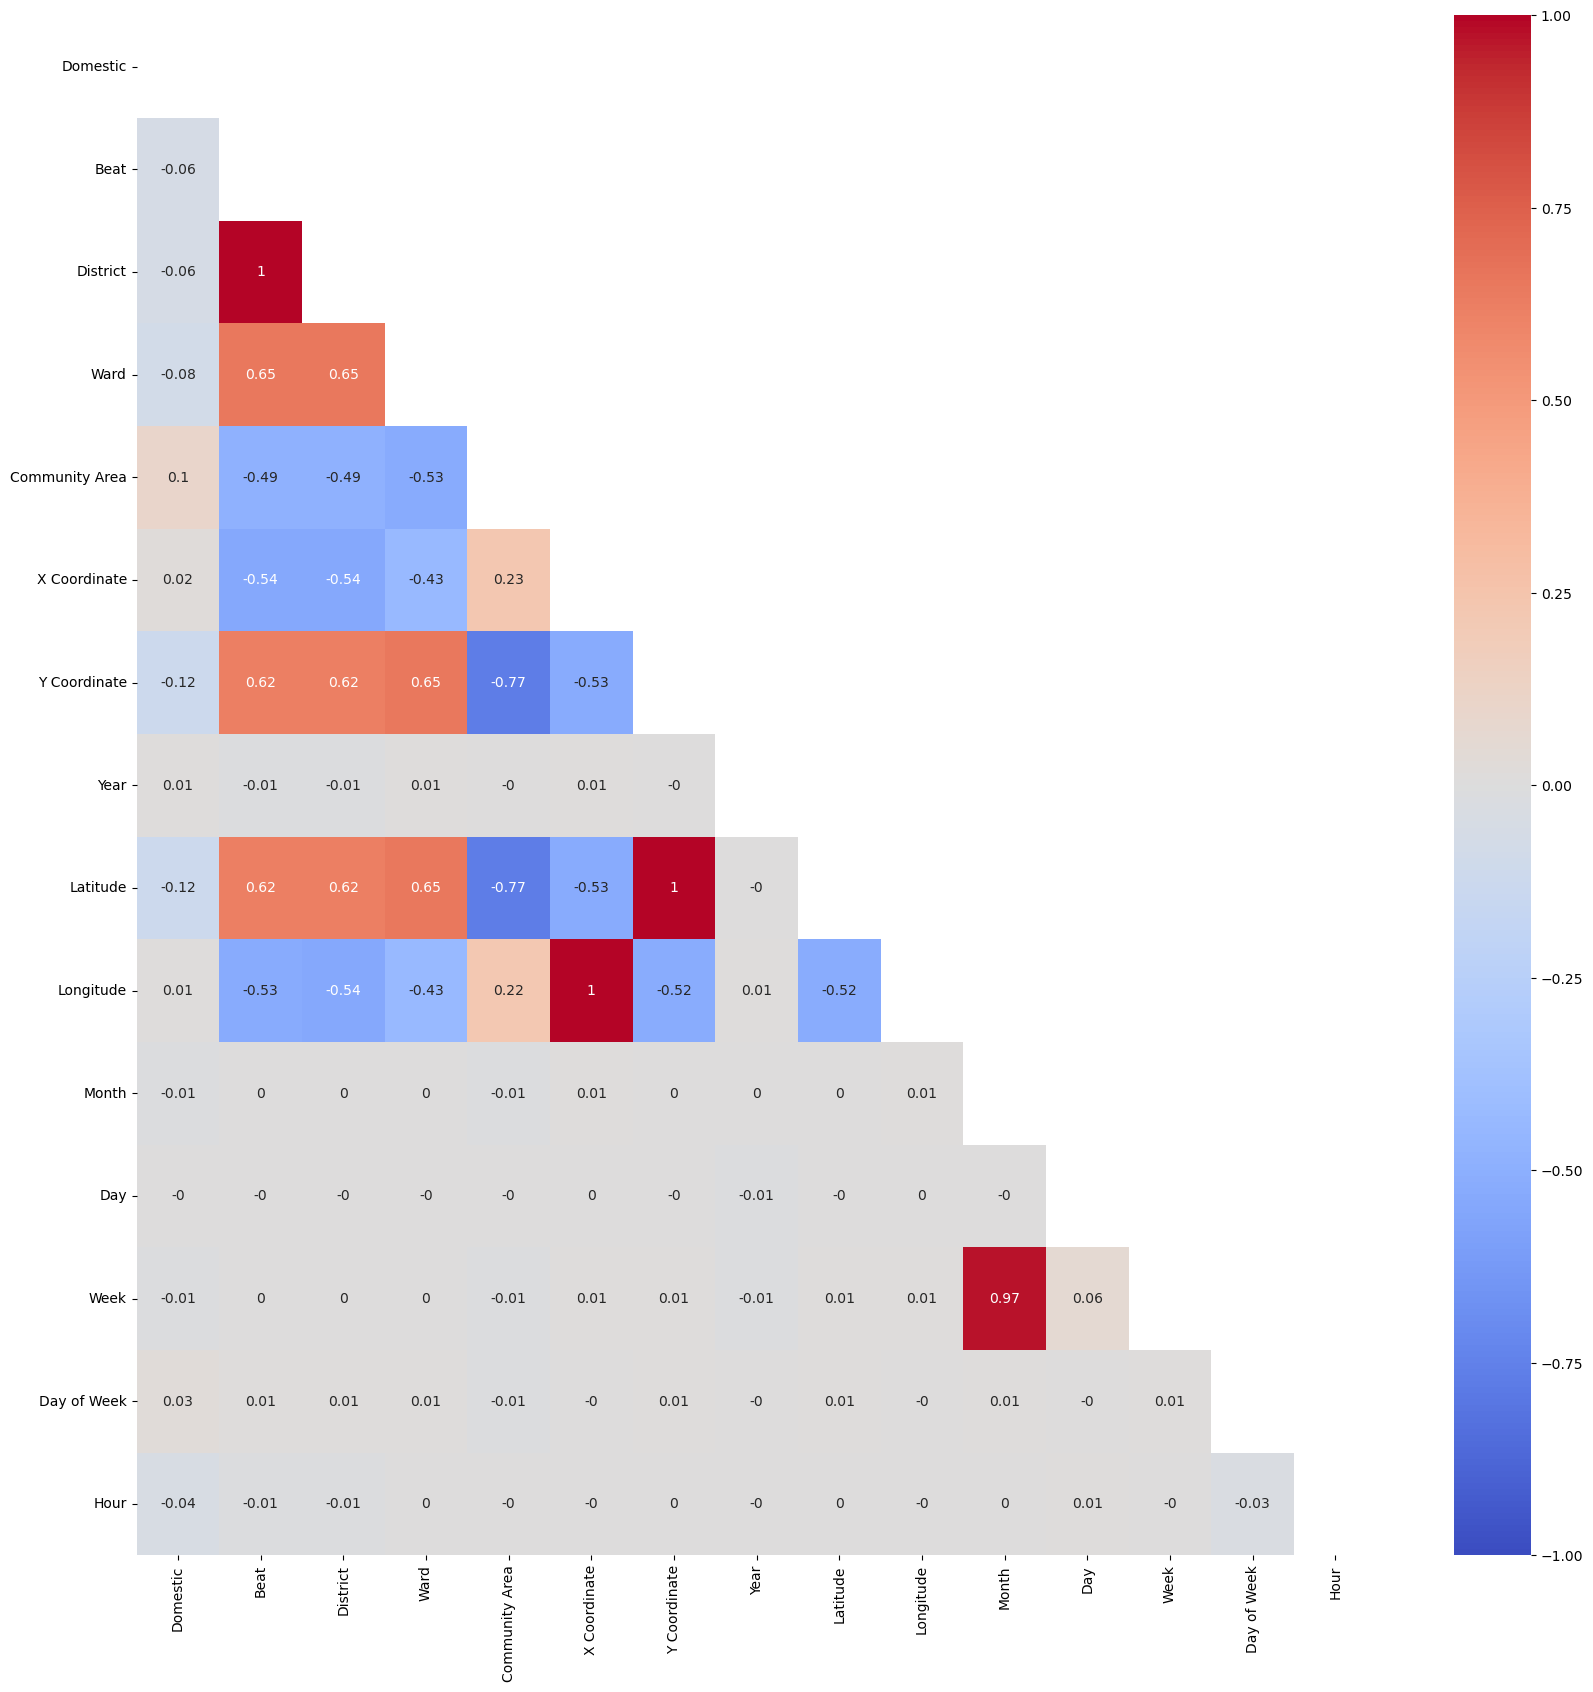

In [76]:
#Calculate all the correlations between each independent variable
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), mask=mask, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.show()

### Observations 

Looking at the above correlation we can see some correlations that make sense. It makes sense that `X Coordinate` and `Longitude` and `Y Coordinate` and `Latitude` have high correlations. This would also be the case for `District` and `Beat` and `Month` and `Week` as well. My next steps: 

- Look at the correlation between the high correlation variables.
- Drop the variable with lower variability. 
- Re-Calculate all of the correlations between each independent variable. 
- Try to get the correlations less than (-0.8 or 0.8 ). This will be our threshold. 

In [77]:
#Taking a look at the correlation between the variables. 
X[['X Coordinate', 'Longitude']].describe()

,X Coordinate,Longitude
count,1.054833e+06,1.054833e+06
mean,1.164876e+06,-8.767047e+01
std,1.621609e+04,5.900848e-02
min,0.000000e+00,-9.168657e+01
25%,1.153213e+06,-8.771275e+01
50%,1.166708e+06,-8.766394e+01
75%,1.176452e+06,-8.762784e+01
max,1.205119e+06,-8.752453e+01


I will drop `Longitude` as it has a lower variability within it.

In [78]:
#Dropping the Longitude column
X.drop('Longitude', axis=1, inplace=True)

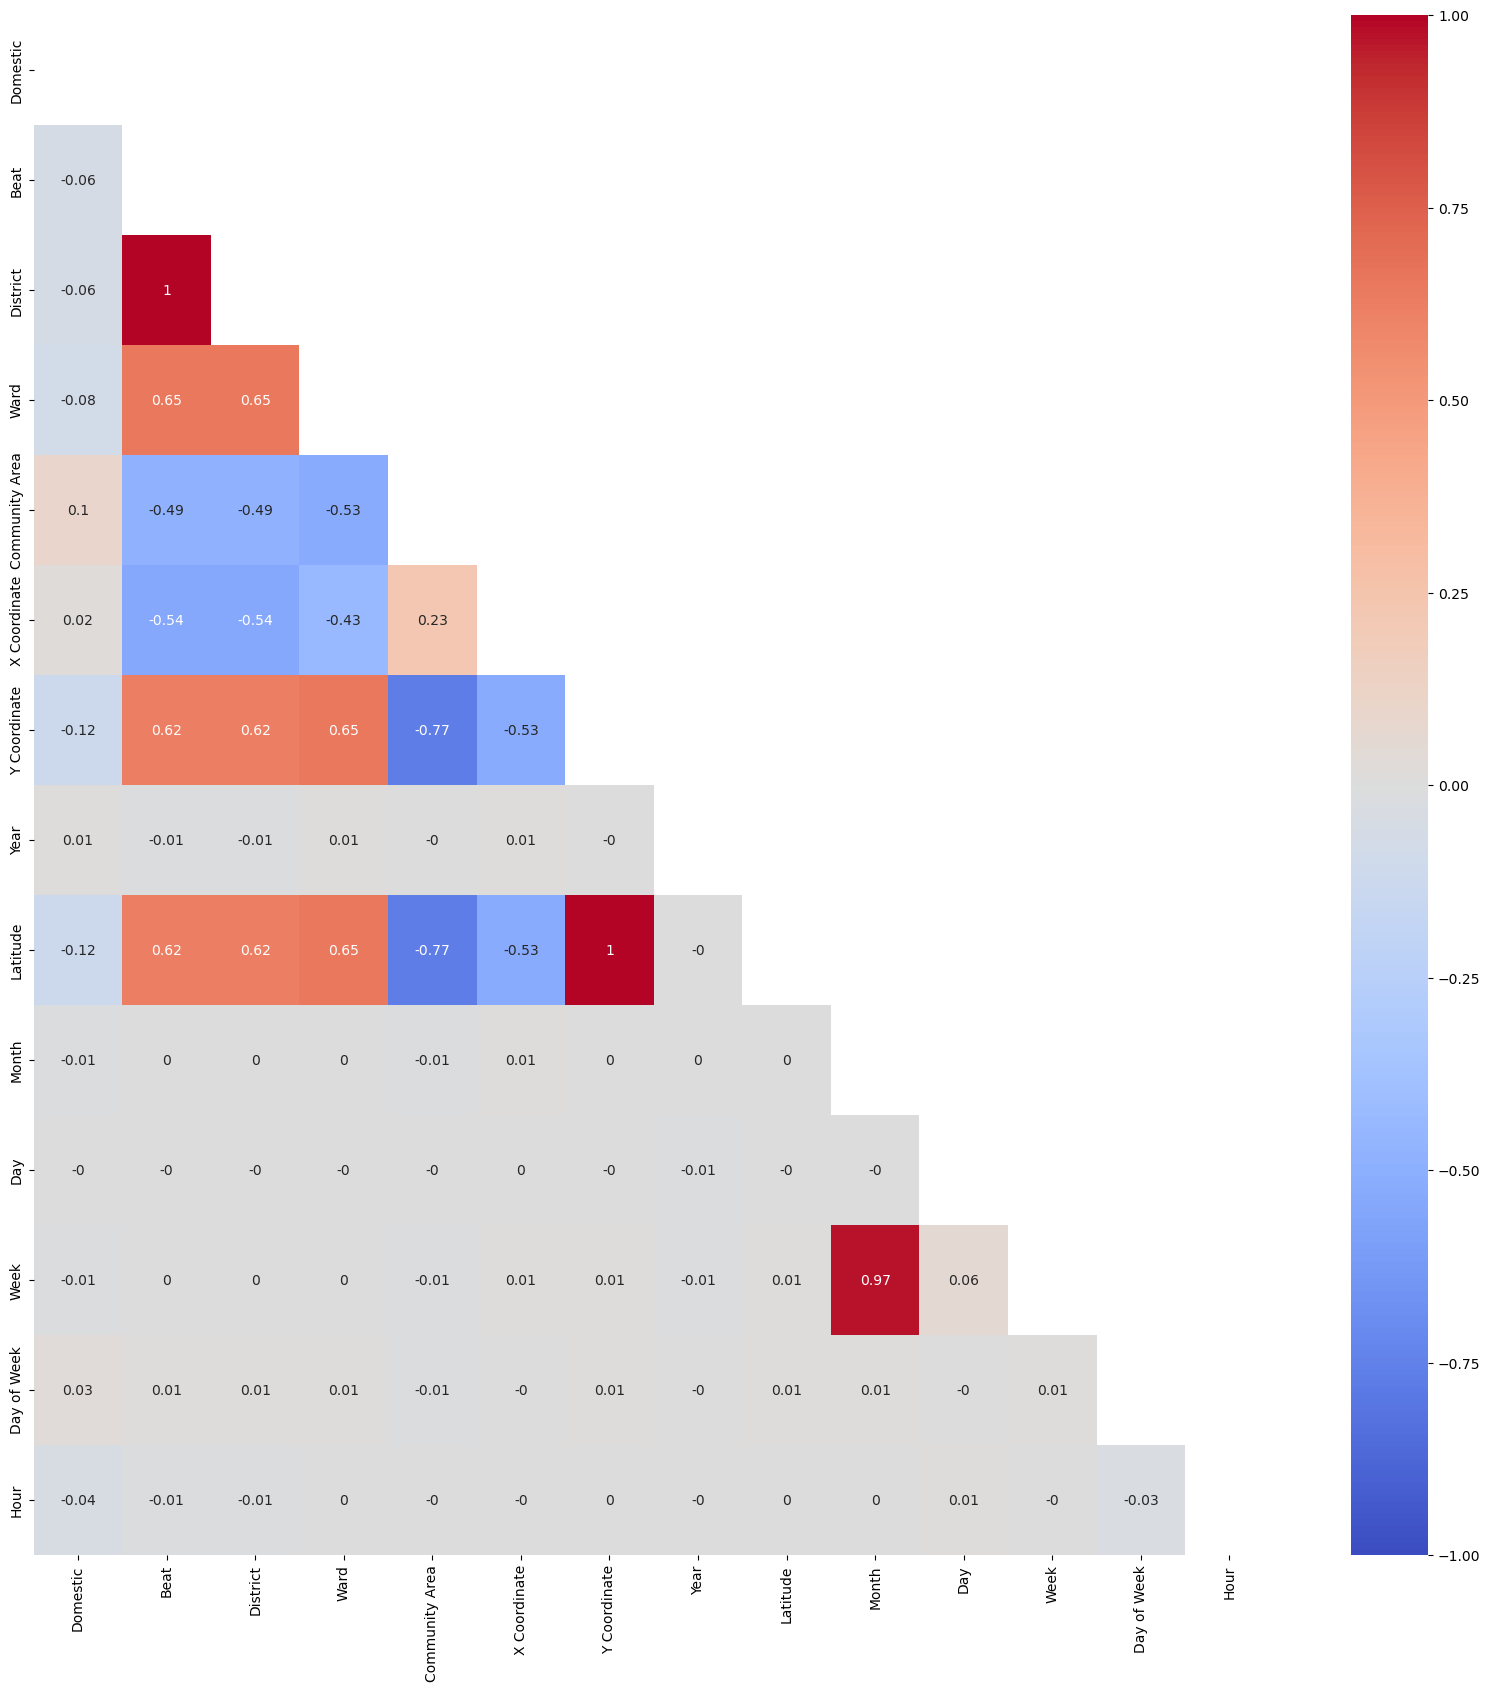

In [79]:
#Re-calculating all the correlations between each independent variable
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), mask=mask, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.show()

In [80]:
#Taking a look at the correlation between the variables. 
X[['Y Coordinate', 'Latitude']].describe()

,Y Coordinate,Latitude
count,1.054833e+06,1.054833e+06
mean,1.886464e+06,4.184405e+01
std,3.126921e+04,8.599524e-02
min,0.000000e+00,3.661945e+01
25%,1.859318e+06,4.176933e+01
50%,1.893908e+06,4.186449e+01
75%,1.908713e+06,4.190528e+01
max,1.951535e+06,4.202267e+01


I will drop `Y Coordinate` as it has a lower variability within it.

In [81]:
#Dropping the Y Coordinate column
X.drop('Y Coordinate', axis=1, inplace=True)

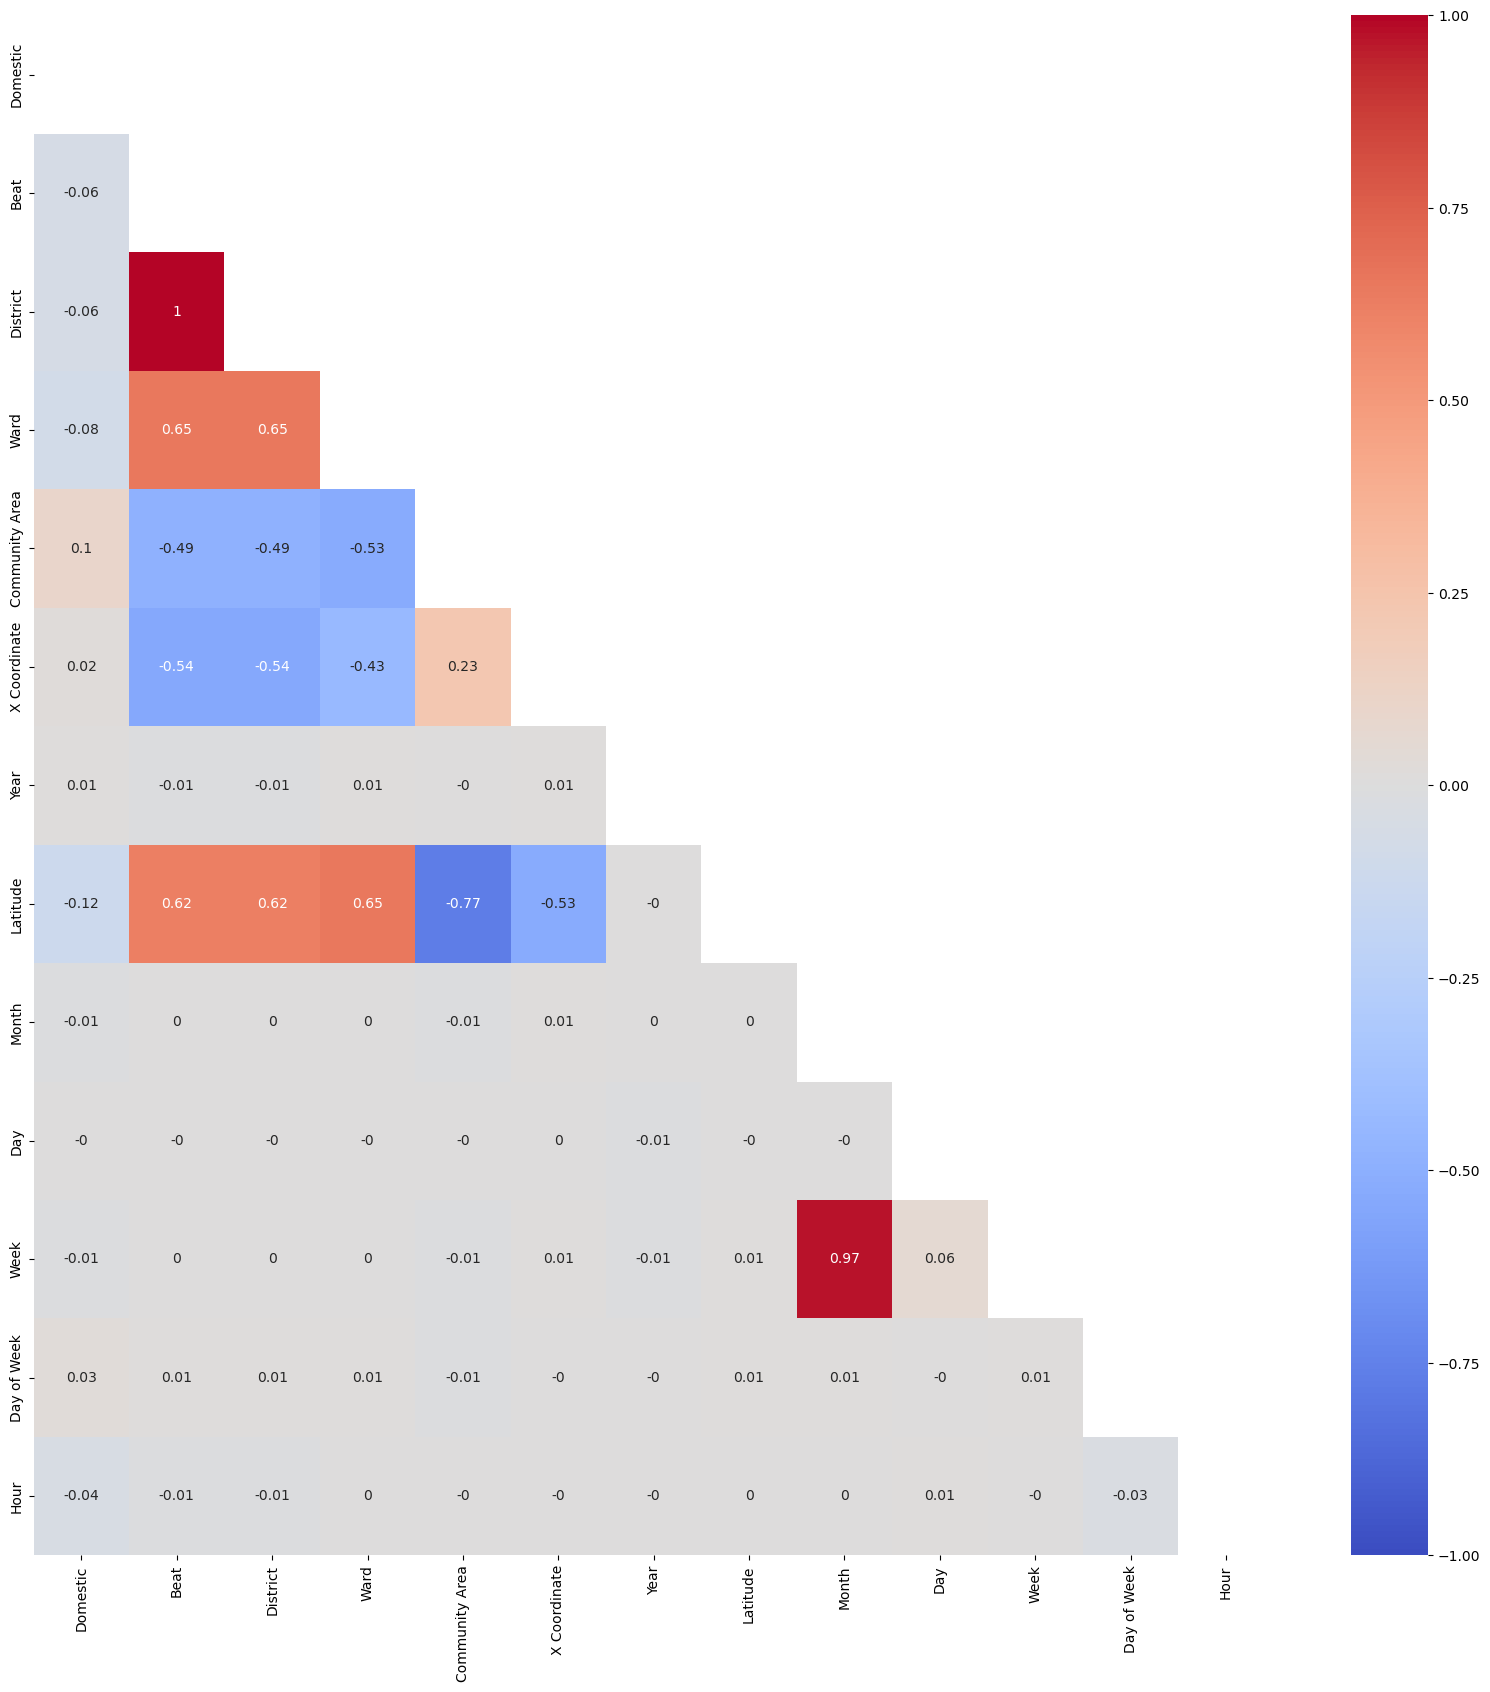

In [82]:
#Re-calculating all the correlations between each independent variable
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), mask=mask, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.show()

In [83]:
#Taking a look at the correlation between the variables. 
X[['District', 'Beat']].describe()

,District,Beat
count,1.054833e+06,1.054833e+06
mean,1.119829e+01,1.142671e+03
std,6.945085e+00,6.952683e+02
min,1.000000e+00,1.110000e+02
25%,6.000000e+00,6.120000e+02
50%,1.000000e+01,1.024000e+03
75%,1.700000e+01,1.713000e+03
max,3.100000e+01,2.535000e+03


I will drop `District` as it has a lower variability within it.

In [84]:
#Dropping the District column
X.drop('District', axis=1, inplace=True)

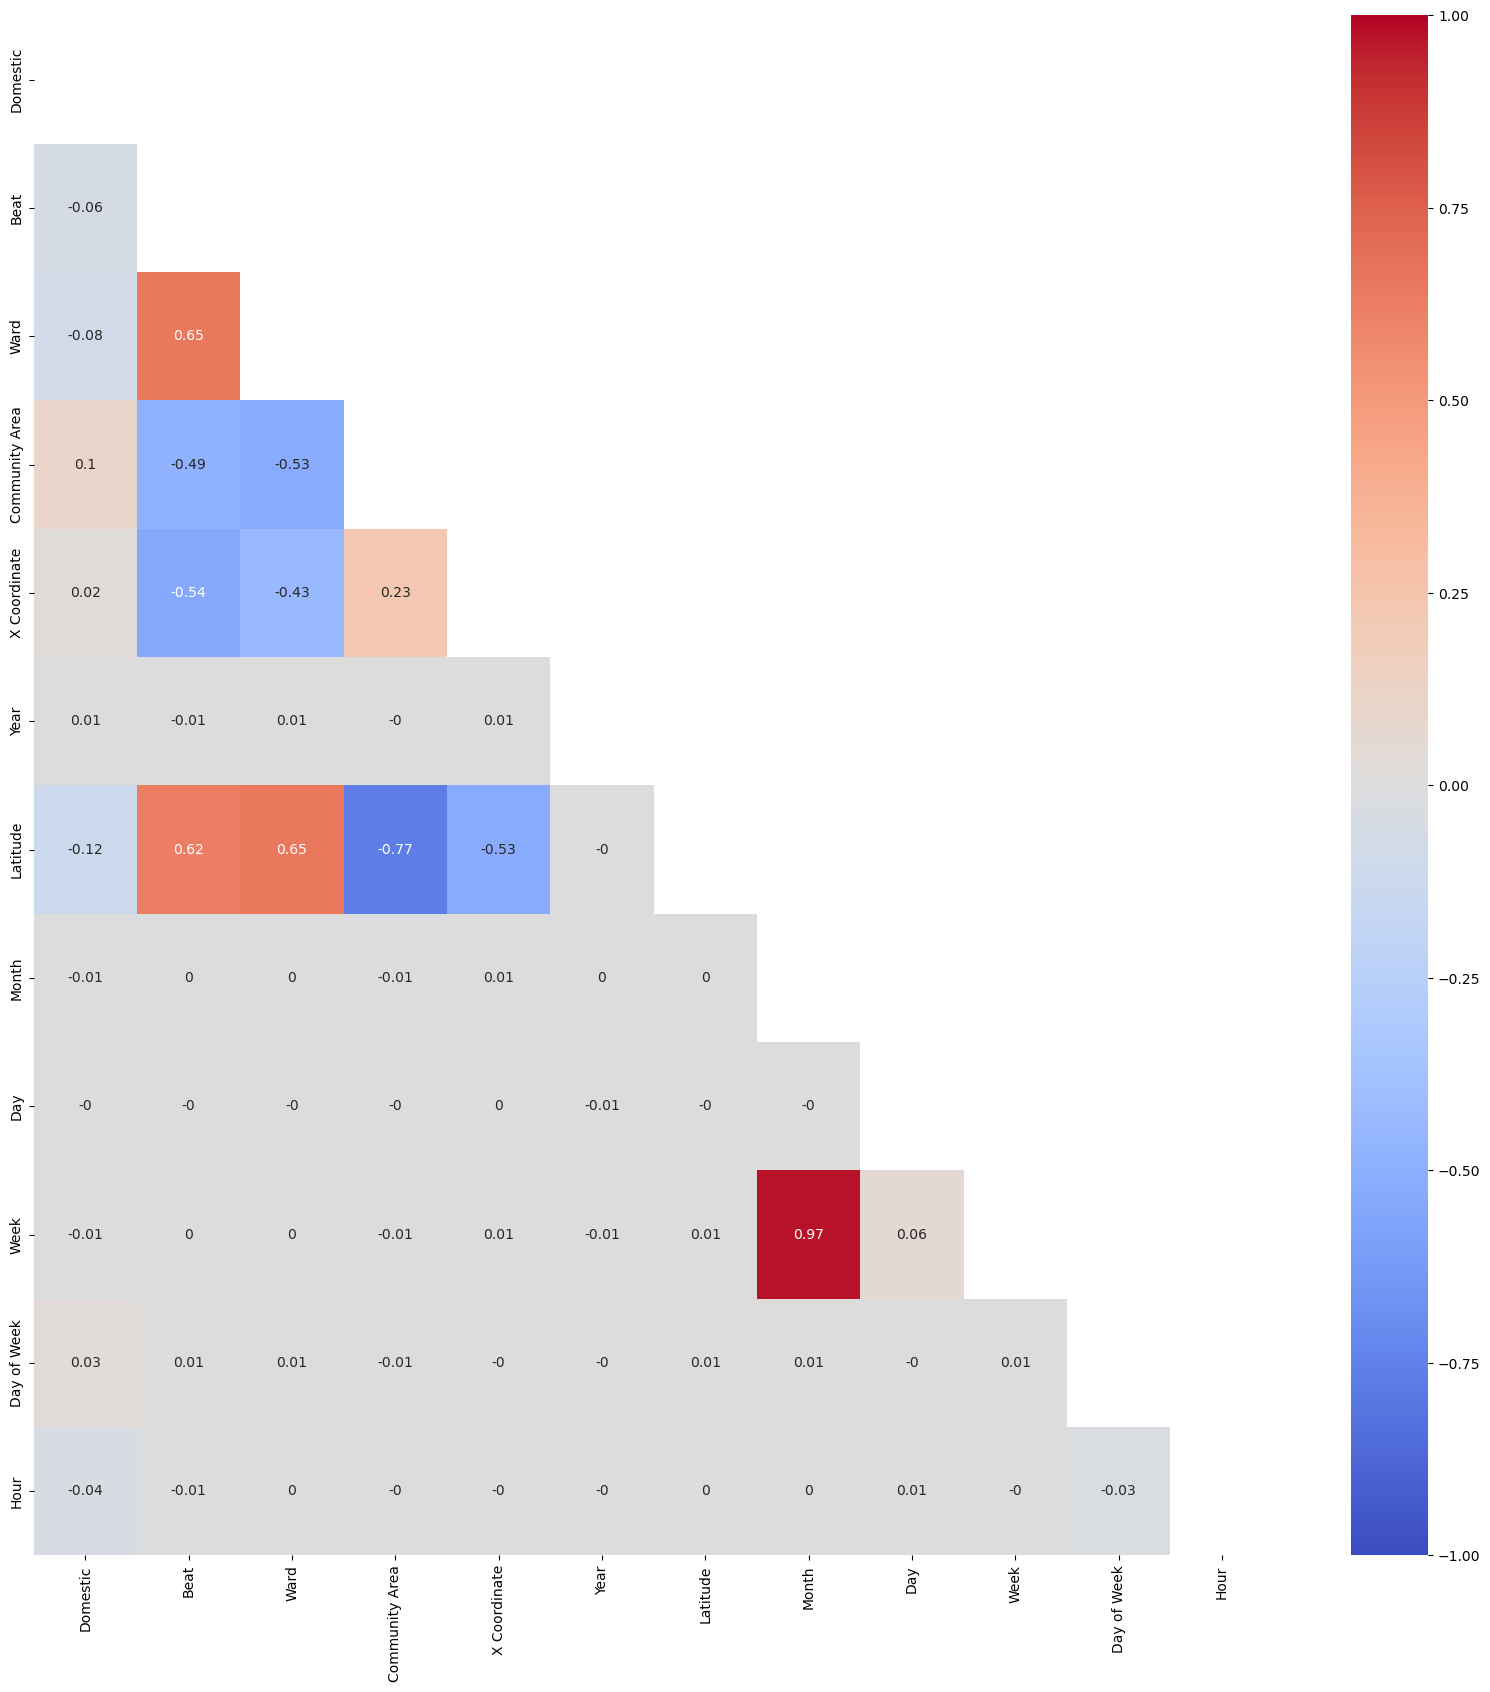

In [85]:
#Re-calculating all the correlations between each independent variable
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), mask=mask, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.show()

In [86]:
#Taking a look at the correlation between the variables. 
X[['Week', 'Month']].describe()

,Week,Month
count,1.054833e+06,1.054833e+06
mean,2.680128e+01,6.583175e+00
std,1.460143e+01,3.346088e+00
min,1.000000e+00,1.000000e+00
25%,1.500000e+01,4.000000e+00
50%,2.700000e+01,7.000000e+00
75%,3.900000e+01,9.000000e+00
max,5.300000e+01,1.200000e+01


I will drop `Week` as it has a lower variability within it.

In [87]:
#Dropping the District column
X.drop('Week', axis=1, inplace=True)

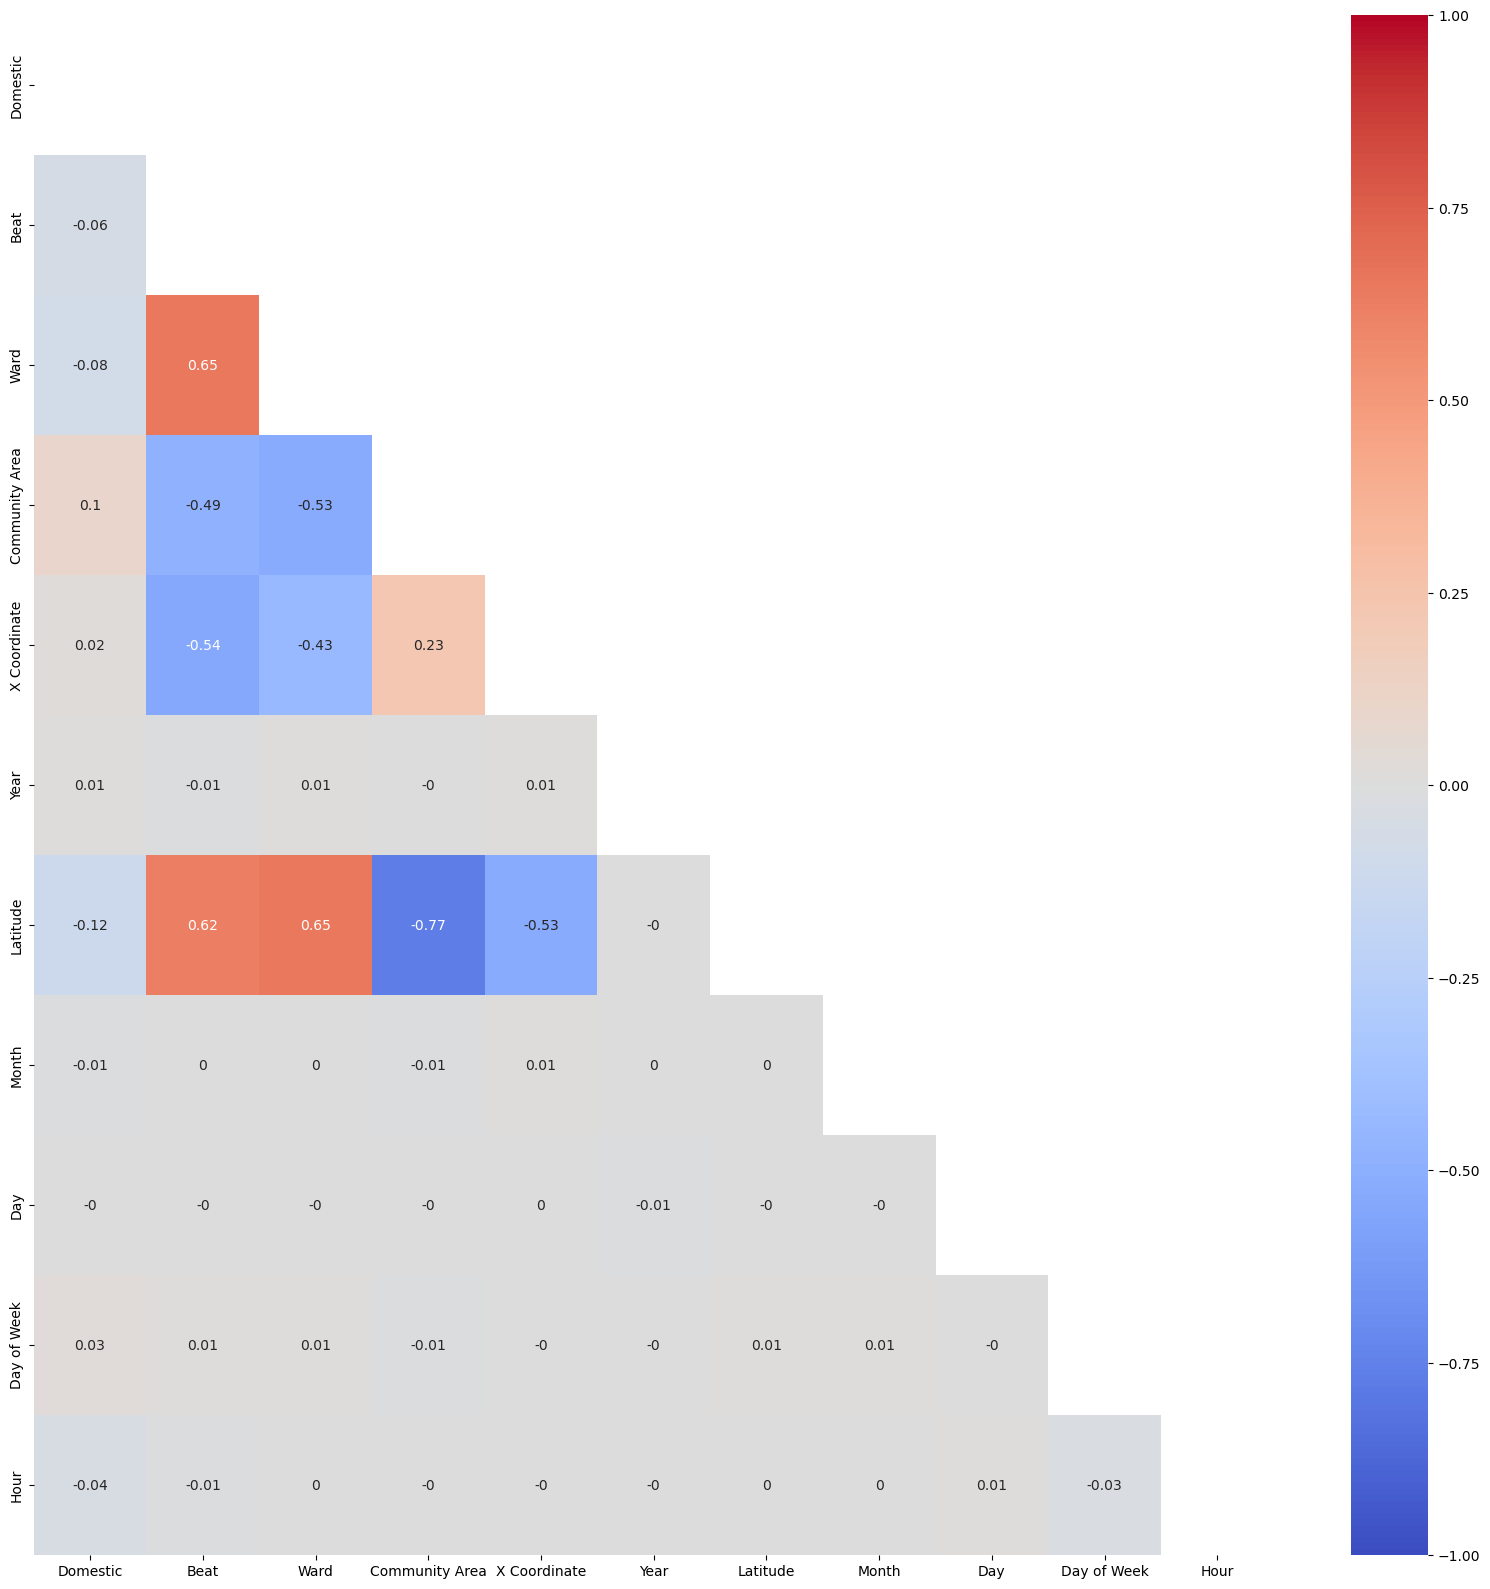

In [88]:
#Re-calculating all the correlations between each independent variable
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), mask=mask, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.show()

Looking at the above, we see now that all correlations are 0.8 or below. We state this to be addressing collinearity in the dataset to a sufficient degree and now can continue to the modeling.

## Backward Selection

In backward selection, we fit a model with all data available to us to start, then remove variables based upon whether or not they are significant (and informed by subject matter knowledge), until will reach a model of desired simplicity with sufficient predictive power. I will now begin modeling. 

In [89]:
#Add the constant
X_const = sm.add_constant(X)

#Instantiate the model
bank_logit = sm.Logit(y, X_const)

#Fit the model to the data
bank_logit_fitted = bank_logit.fit()


#Look at the summary for results
bank_logit_fitted.summary()

Optimization terminated successfully.
         Current function value: 0.498085
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Arrest   No. Observations:              1054833
Model:                          Logit   Df Residuals:                  1054821
Method:                           MLE   Df Model:                           11
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                 0.01271
Time:                        15:17:07   Log-Likelihood:            -5.2540e+05
converged:                       True   LL-Null:                   -5.3216e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             76.3552      5.151     14.825      0.000      66.260      86.450
Domestic          -0.2717      0.007    -39.045      0.000      -0.285      -0.258
Beat              -0.0002   5.21e-06    -36.398      0.000      -0.000      -0.000
Ward               0.0008      0.000      3.087      0.002       0.000       0.001
Community Area    -0.0058      0.000    -27.786      0.000      -0.006      -0.005
X Coordinate   -1.544e-05   2.09e-07    -74.000      0.000   -1.58e-05    -1.5e-05
Year               0.0398      0.002     18.234      0.000       0.036       0.044
Latitude          -3.3398      0.061    -54.630      0.000      -3.460      -3.220
Month             -0.0201      0.001    -27.542      0.000      -0.021      -0.019
Day                0.0001      0.000      0.538      0.591      -0.000       0.001
Day of Week        0.0133      0.001     10.819      0.000       0.011       0.016
Hour               0.0208      0.000     54.484      0.000       0.020       0.022
==================================================================================
"""

**As noted above, that for many variables, the associated p-values with the coefficients are small. We can safely reject the null hypothesis. These independent variables are likely predictive of the dependent variable. I will move forward with a prediction for y. Our threshold for hard predictions will be 0.5.**

In [90]:
#Caluculate soft predictions
y_proba = bank_logit_fitted.predict(X_const)

#Convert soft prediction into a hard prediction
y_pred = np.where(y_proba >= 0.5, 1, 0)

In [91]:
#Calculate the accuracy

num_correct = (y_pred == y).sum()

#Calculate the percentage accuracy

pct_accuracy = num_correct/X.shape[0]*100

print(f'The baseline accuracy for the model is {np.round(pct_accuracy, 3)}%')

The baseline accuracy for the model is 79.703%


Given the data on crimes in Chicago, we can predict with ~80% accuracy whether or not that crime will result in an arrest.

We see that the p-value for `Day` is a little larger (~0.6) than our baseline. From a crime standpoint, this variable may not be of much interest, unless the `Day` falls on a weekend. Also, I do not think it is predictive of the outcome. Example, **"Will there be an `Arrest` on the 7th or 8th of this month?"** Therefore we elect to drop this variable from our model and see the effect on the result.

In [92]:
#Drop Day
X2 = X.drop('Day', axis=1)

In [93]:
#Add the constant
X2_const = sm.add_constant(X2)

#Instantiate the model
bank_logit2 = sm.Logit(y, X2_const)

#Fit the model to the data
bank_logit_fitted2 = bank_logit2.fit()

#Look at the summary for results
bank_logit_fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.498085
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Arrest   No. Observations:              1054833
Model:                          Logit   Df Residuals:                  1054822
Method:                           MLE   Df Model:                           10
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                 0.01271
Time:                        15:39:03   Log-Likelihood:            -5.2540e+05
converged:                       True   LL-Null:                   -5.3216e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             76.3749      5.150     14.829      0.000      66.280      86.470
Domestic          -0.2717      0.007    -39.044      0.000      -0.285      -0.258
Beat              -0.0002   5.21e-06    -36.398      0.000      -0.000      -0.000
Ward               0.0008      0.000      3.086      0.002       0.000       0.001
Community Area    -0.0058      0.000    -27.786      0.000      -0.006      -0.005
X Coordinate   -1.544e-05   2.09e-07    -73.998      0.000   -1.58e-05    -1.5e-05
Year               0.0398      0.002     18.230      0.000       0.035       0.044
Latitude          -3.3397      0.061    -54.629      0.000      -3.460      -3.220
Month             -0.0201      0.001    -27.542      0.000      -0.021      -0.019
Day of Week        0.0133      0.001     10.817      0.000       0.011       0.016
Hour               0.0208      0.000     54.496      0.000       0.020       0.022
==================================================================================
"""

In [94]:
#Caluculate soft predictions for second model
y_proba2 = bank_logit_fitted2.predict(X2_const)

#Convert soft prediction into a hard prediction
y_pred2 = np.where(y_proba2 >= 0.5, 1, 0)

In [95]:
#Calculate the accuracy
num_correct2 = (y_pred2 == y).sum()

#Calculate the percentage accuracy
pct_accuracy2 = num_correct2/X.shape[0]*100

print(f'The baseline accuracy for the model-2 is {np.round(pct_accuracy2, 3)}%')

The baseline accuracy for the model-2 is 79.703%


**When removing the `Day` column it is observed that the baseline accruacy is still the same, roughly 80%. Even though all coefficients are not statistically significant, I will examine the model parameters for those that appear to be highly predictive.**

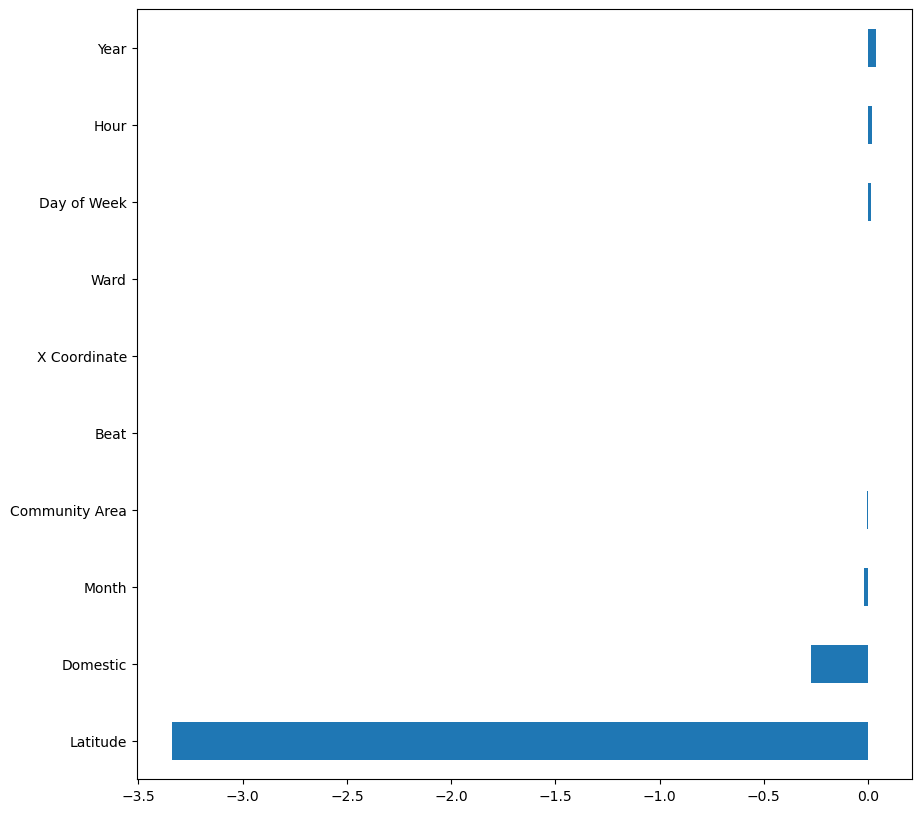

In [98]:
#Model coefficients
params_series = bank_logit_fitted2.params
p_values_series = bank_logit_fitted2.pvalues

significant_params = params_series[p_values_series < 0.05]
significant_params.drop('const', inplace=True)


plt.figure(figsize=(10,10))
significant_params.sort_values().plot(kind='barh')
plt.show()

In [99]:
# p-value
bank_logit_fitted2.pvalues

const              9.532038e-50
Domestic           0.000000e+00
Beat              4.506391e-290
Ward               2.025801e-03
Community Area    6.327095e-170
X Coordinate       0.000000e+00
Year               2.956268e-74
Latitude           0.000000e+00
Month             5.444450e-167
Day of Week        2.849155e-27
Hour               0.000000e+00
dtype: float64

Looking at the figure above, and the p-values above, the hour, and day of week are predictive of an arrest taking place.

Factors that are negatively predictive, meaning an arrest is less likely occur Latitude, Domestic, and Month.

## Conclusion

This notebook is a continuation of the Chicago Crime Stats series. We inspected the data, converted non-numerical data to numerical data for modeling, and then proceeded to see the correlation of the independent variables to the dependent variable, `Arrest`.

We then proceeded to conduct two baseline logistic regression models. It was observed that our baseline model scored ~80% accuracy for both. The next steps will include the following: 

- Save clean dataframe for more modeling.
- Test the clean data using Logistic Regression, KNN, and a Decision Tree.

**Creating the new dataset and saving as a 'csv'.**

In [101]:
#Creating new dataset.

clean_df.to_csv('crime_clean_data.csv',index = False)